<a href="https://colab.research.google.com/github/maz-joko78/VTCI-LANDSAT-LC08-C02-T1_L2/blob/main/UAS_SBP_dan_Maggy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
# ==============================================================================
# TAHAP 1: PERSIAPAN LINGKUNGAN DAN INSTALASI LIBRARY
# ==============================================================================
print("Menginstal library yang dibutuhkan...")
!pip install pandas matplotlib seaborn folium geopandas -q

# Import library yang sudah diinstal
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import os
from google.colab import drive

print("\nLibrary berhasil diinstal dan diimpor.")
print("Menghubungkan ke Google Drive...")

# Menghubungkan Google Colab dengan Google Drive Anda
# Anda akan diminta untuk melakukan autentikasi
drive.mount('/content/drive')

print("\nGoogle Drive berhasil terhubung!")

Menginstal library yang dibutuhkan...

Library berhasil diinstal dan diimpor.
Menghubungkan ke Google Drive...
Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).

Google Drive berhasil terhubung!


In [21]:
# ==============================================================================
# TAHAP 2: DEFINISI PATH DAN PEMUATAN DATA
# ==============================================================================
# Di sini kita akan mendefinisikan semua path file yang Anda berikan.
# PENTING: Pastikan struktur folder di Google Drive Anda sama persis.
# Colab membaca "My Drive" sebagai "/content/drive/My Drive/"

base_path = "/content/drive/My Drive/"

# --- List Path File SBP ---
sbp_ternate_paths = [
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025033918.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025032414.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025031757.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025024715.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025024700.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025022935.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025022041.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025020426.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025014012.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025012638.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025010829.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025005636.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025003706.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025002530.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025001234.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_08032025000000.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_07032025235714.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_07032025234543.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_07032025224616.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_07032025215426.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_07032025185249.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_07032025125349.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_07032025120000.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_07032025001339.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_07032025000000.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_06032025235209.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_06032025234923.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_06032025234628.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_06032025190818.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_06032025112300.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_06032025181804.ses",
"TUGAS_ADHO/4.SBP/250302/SBP_Ternate-Tidore_PLTMG_06032025000300.ses"

]

sbp_jayapura_paths = [
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_05032025020853.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_05032025014439.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_05032025014427.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_05032025013637.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_05032025010908.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_05032025004910.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_05032025004757.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_05032025002233.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_05032025000027.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_05032025000000.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_04032025235935.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_04032025224538.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_04032025175956.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_04032025122754.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_04032025000254.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_03032025235803.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_03032025164459.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_03032025000242.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_03032025000000.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_02032025235115.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_02032025200241.ses",
"TUGAS_ADHO/4.SBP/250301/SBP_JayapuraPLTMG_02032025125304.ses",
]

# --- List Path File Magnetometer ---
# Kita fokus pada file yang kemungkinan besar bisa dibaca langsung seperti .csv atau .GPS
maggy_0103_folder = "TUGAS_ADHO/5. Magnetometer/01032025/"
maggy_0203_folder = "TUGAS_ADHO/5. Magnetometer/02032025/"

# Membuat path lengkap
maggy_0103_gps_path = os.path.join(base_path, maggy_0103_folder, "01032025.Survey.GPS.GPS")
maggy_0203_gps_path = os.path.join(base_path, maggy_0203_folder, "02032025.Survey.GPS.GPS")

print("Path file telah didefinisikan.")
print("\nContoh path lengkap file GPS Maggy 01032025:")
print(maggy_0103_gps_path)
print("\nContoh path lengkap file GPS Maggy 02032025:")
print(maggy_0203_gps_path)


# Verifikasi apakah file ada
print("\nMemverifikasi keberadaan file GPS:")
if os.path.exists(maggy_0103_gps_path):
    print(f"SUCCESS: File {os.path.basename(maggy_0103_gps_path)} ditemukan.")
else:
    print(f"PERINGATAN: File {os.path.basename(maggy_0103_gps_path)} TIDAK ditemukan. Periksa kembali path Anda.")

if os.path.exists(maggy_0203_gps_path):
    print(f"SUCCESS: File {os.path.basename(maggy_0203_gps_path)} ditemukan.")
else:
    print(f"PERINGATAN: File {os.path.basename(maggy_0203_gps_path)} TIDAK ditemukan. Periksa kembali path Anda.")

Path file telah didefinisikan.

Contoh path lengkap file GPS Maggy 01032025:
/content/drive/My Drive/TUGAS_ADHO/5. Magnetometer/01032025/01032025.Survey.GPS.GPS

Contoh path lengkap file GPS Maggy 02032025:
/content/drive/My Drive/TUGAS_ADHO/5. Magnetometer/02032025/02032025.Survey.GPS.GPS

Memverifikasi keberadaan file GPS:
SUCCESS: File 01032025.Survey.GPS.GPS ditemukan.
SUCCESS: File 02032025.Survey.GPS.GPS ditemukan.


Processing file: SBP_Ternate-Tidore_PLTMG_08032025033918.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025032414.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025031757.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025024715.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025024700.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025022935.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025022041.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025020426.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025014012.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025012638.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025010829.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025005636.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025003706.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025002530.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025001234.ses
Processing file: SBP_Ternate-Tidore_PLTMG_08032025000000.ses
Processing file: SBP_Ter

/tmp/ipython-input-22-4125906555.py:56: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df_sbp, x='Lokasi', palette='viridis')


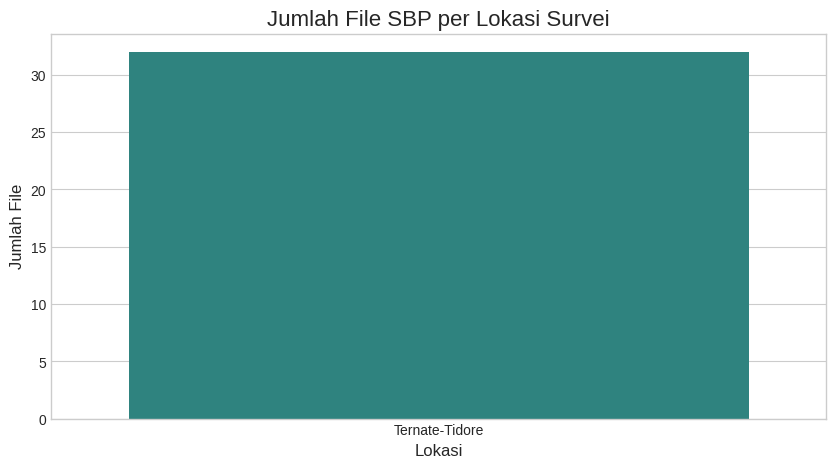

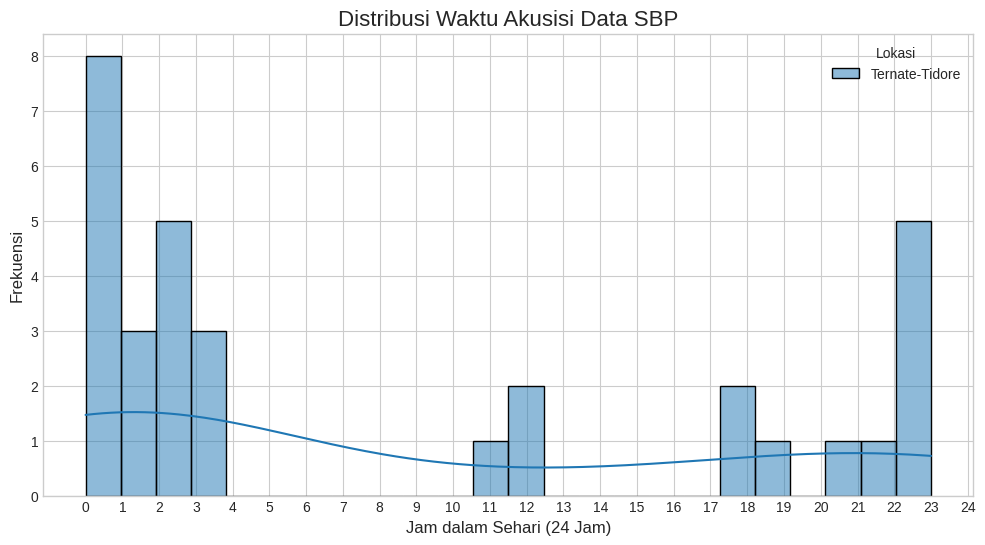

In [22]:
# ==============================================================================
# TAHAP 3: PENGOLAHAN & ANALISIS DATA SBP
# ==============================================================================
# Karena data SBP ada di nama file, kita akan mem-parsing (mengurai) nama file tersebut.

def parse_sbp_filename(file_path):
    """Fungsi untuk mengurai nama file SBP menjadi informasi yang berguna."""
    filename = os.path.basename(file_path)
    print(f"Processing file: {filename}") # Tambahkan baris ini untuk debug
    parts = filename.split('_')

    # Tambahkan pengecekan untuk memastikan list 'parts' memiliki elemen yang cukup
    if len(parts) < 4:
        print(f"Skipping file due to unexpected format: {filename}")
        return None # Atau raise error yang lebih spesifik

    lokasi = parts[1]
    datetime_str = parts[3].split('.')[0]

    # Konversi string tanggal dan waktu menjadi format yang bisa dibaca
    # Format: DDMMYYYYHHMMSS
    try:
        tanggal = pd.to_datetime(datetime_str, format='%d%m%Y%H%M%S')
    except ValueError:
        print(f"Could not parse datetime from filename: {filename}")
        return None # Atau sesuaikan penanganan error tanggal

    return {
        "Lokasi": lokasi,
        "TanggalWaktu": tanggal,
        "Path": file_path
    }

# Gabungkan semua path SBP menjadi satu list
all_sbp_paths = sbp_ternate_paths + sbp_jayapura_paths
full_sbp_paths = [os.path.join(base_path, p) for p in all_sbp_paths]


# Buat DataFrame (tabel) dari hasil parsing
# Filter hasil parsing untuk menghilangkan None (file yang dilewati)
sbp_data = [parse_sbp_filename(p) for p in full_sbp_paths]
sbp_data = [item for item in sbp_data if item is not None] # Filter None
df_sbp = pd.DataFrame(sbp_data)

print("DataFrame Data SBP berhasil dibuat:")
print(df_sbp.head()) # Tampilkan 5 baris pertama

# --- ANALISIS SEDERHANA DATA SBP ---
print("\n--- Analisis Metadata SBP ---")
print("\n1. Jumlah data per lokasi:")
print(df_sbp['Lokasi'].value_counts())

# --- VISUALISASI DATA SBP ---
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 5))
sns.countplot(data=df_sbp, x='Lokasi', palette='viridis')
ax.set_title('Jumlah File SBP per Lokasi Survei', fontsize=16)
ax.set_xlabel('Lokasi', fontsize=12)
ax.set_ylabel('Jumlah File', fontsize=12)
plt.show()

# Visualisasi distribusi waktu akuisisi
df_sbp['Jam'] = df_sbp['TanggalWaktu'].dt.hour
fig, ax = plt.subplots(figsize=(12, 6))
sns.histplot(data=df_sbp, x='Jam', hue='Lokasi', multiple='stack', bins=24, kde=True)
ax.set_title('Distribusi Waktu Akusisi Data SBP', fontsize=16)
ax.set_xlabel('Jam dalam Sehari (24 Jam)', fontsize=12)
ax.set_ylabel('Frekuensi', fontsize=12)
ax.set_xticks(range(25))
plt.show()

Mencoba membaca dan memproses file GPS: /content/drive/My Drive/TUGAS_ADHO/5. Magnetometer/01032025/01032025.Survey.GPS.GPS
Data GPS Magnetometer 01/03/2025 berhasil dibaca dan diproses:


,Latitude_NMEA,Longitude_NMEA,Lat_Hemisphere,Lon_Hemisphere,Latitude,Longitude,UTC_Time
0,45.696834,12722.632407,N,E,0.761614,127.377207,22747.0
1,45.695959,12722.632136,N,E,0.761599,127.377202,22748.0
2,45.695047,12722.632002,N,E,0.761584,127.377200,22749.0
3,45.694148,12722.631725,N,E,0.761569,127.377195,22750.0
4,45.693256,12722.631503,N,E,0.761554,127.377192,22751.0


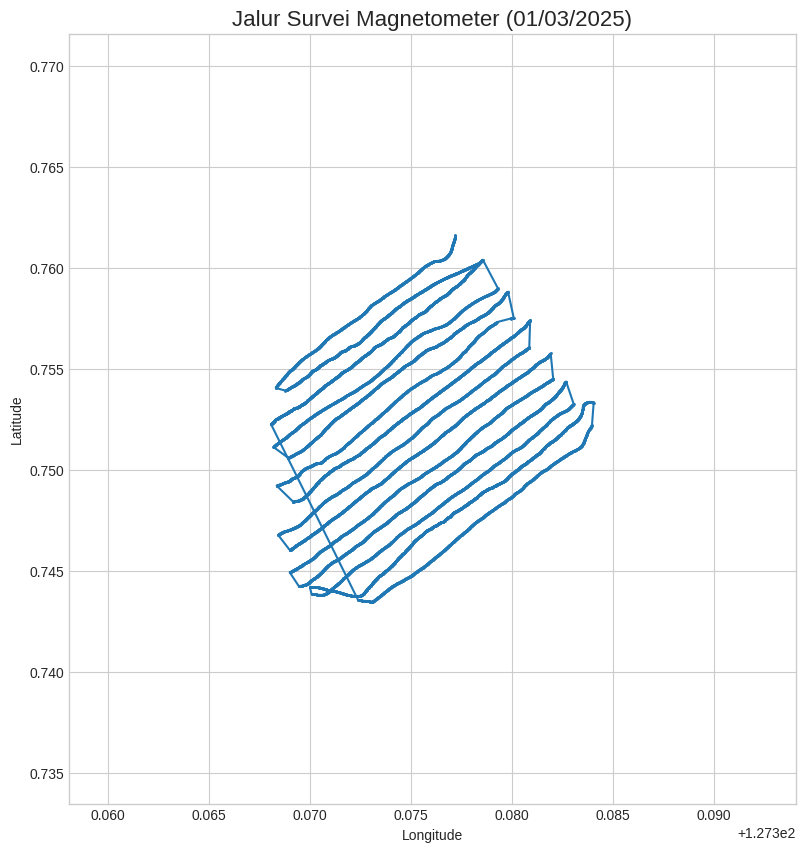


Membuat peta interaktif...


In [23]:
# ==============================================================================
# TAHAP 4: PENGOLAHAN & ANALISIS DATA MAGNETOMETER (MAGGY)
# ==============================================================================
# Kita akan fokus pada file .GPS.GPS yang teridentifikasi dalam format NMEA GPGGA.

def convert_nmea_coords(coord, hemisphere):
    """Mengkonversi koordinat NMEA (ddmm.mmmmmm) ke format desimal."""
    if pd.isna(coord):
        return None
    try:
        degrees = int(coord) // 100
        minutes = coord % 100
        decimal_degrees = degrees + minutes / 60
        if hemisphere == 'S' or hemisphere == 'W':
            decimal_degrees *= -1
        return decimal_degrees
    except:
        return None

try:
    print(f"Mencoba membaca dan memproses file GPS: {maggy_0103_gps_path}")

    # Membaca file GPS. Menggunakan koma sebagai pemisah dan menentukan nama kolom berdasarkan format GPGGA
    # Kolom yang relevan untuk posisi dan waktu adalah:
    # 2: Latitude (ddmm.mmmmmm)
    # 3: N/S indicator
    # 4: Longitude (dddmm.mmmmmm)
    # 5: E/W indicator
    # 1: UTC Time of Position (hhmmss.ss)
    # Baris di akhir setelah '*' tampaknya berisi tanggal dan waktu tambahan
    df_maggy_gps_01 = pd.read_csv(
        maggy_0103_gps_path,
        sep=',',
        header=None,
        names=[f'col{i}' for i in range(20)], # Beri nama sementara untuk semua kolom yang mungkin ada
        on_bad_lines='skip'
    )

    # Filter hanya baris yang dimulai dengan $GPGGA
    df_maggy_gps_01 = df_maggy_gps_01[df_maggy_gps_01['col0'] == '$GPGGA'].copy()

    # Ekstrak dan konversi Latitude dan Longitude
    df_maggy_gps_01['Latitude_NMEA'] = pd.to_numeric(df_maggy_gps_01['col2'], errors='coerce')
    df_maggy_gps_01['Longitude_NMEA'] = pd.to_numeric(df_maggy_gps_01['col4'], errors='coerce')
    df_maggy_gps_01['Lat_Hemisphere'] = df_maggy_gps_01['col3']
    df_maggy_gps_01['Lon_Hemisphere'] = df_maggy_gps_01['col5']

    df_maggy_gps_01['Latitude'] = df_maggy_gps_01.apply(
        lambda row: convert_nmea_coords(row['Latitude_NMEA'], row['Lat_Hemisphere']),
        axis=1
    )
    df_maggy_gps_01['Longitude'] = df_maggy_gps_01.apply(
        lambda row: convert_nmea_coords(row['Longitude_NMEA'], row['Lon_Hemisphere']),
        axis=1
    )

    # Gabungkan tanggal dan waktu dari akhir baris
    # Asumsi format di akhir baris adalah 'MM/DD/YY HH:MM:SS.sss' setelah spasi pertama setelah '*'
    # Kita perlu mem-parsing bagian akhir baris asli.
    # Cara yang lebih aman adalah mencoba mem-parsing seluruh baris asli jika memungkinkan.
    # Atau, kita bisa coba gabungkan dari kolom yang ada jika konsisten.
    # Contoh baris: $GPGGA,...*6E  03/01/25 11:28:07.762
    # Tanggal ada di col17 (03/01/25), Waktu di col18 (11:28:07.762) jika dipisah spasi setelah koma terakhir.
    # Mari kita coba parsing ulang bagian akhir baris asli.

    # Coba ekstrak timestamp lengkap dari string asli (jika perlu membaca ulang)
    # Atau, kita bisa gunakan col1 dan kolom tanggal/waktu di akhir jika konsisten
    # Berdasarkan contoh, tanggal di col17 dan waktu di col18 jika dipisah spasi setelah koma terakhir
    # Mari kita gunakan col1 (UTC Time) dulu, ini standar GPGGA
    df_maggy_gps_01['UTC_Time'] = df_maggy_gps_01['col1']

    # Jika perlu menggabungkan dengan tanggal dari akhir baris:
    # df_maggy_gps_01['Date_End'] = df_maggy_gps_01['col17'] # Asumsi col17 adalah tanggal
    # df_maggy_gps_01['Time_End'] = df_maggy_gps_01['col18'] # Asumsi col18 adalah waktu

    # Untuk saat ini, mari kita fokus pada Latitude dan Longitude
    df_maggy_gps_01.dropna(subset=['Latitude', 'Longitude'], inplace=True)


    print("Data GPS Magnetometer 01/03/2025 berhasil dibaca dan diproses:")
    # Tampilkan kolom relevan saja
    display(df_maggy_gps_01[['Latitude_NMEA', 'Longitude_NMEA', 'Lat_Hemisphere', 'Lon_Hemisphere', 'Latitude', 'Longitude', 'UTC_Time']].head())

    # --- VISUALISASI JALUR SURVEI (TRACK LINE) ---

    # 1. Plot Statis menggunakan Matplotlib
    if not df_maggy_gps_01.empty:
        fig, ax = plt.subplots(figsize=(10, 10))
        ax.plot(df_maggy_gps_01['Longitude'], df_maggy_gps_01['Latitude'], marker='.', linestyle='-', markersize=2)
        ax.set_title('Jalur Survei Magnetometer (01/03/2025)', fontsize=16)
        ax.set_xlabel('Longitude')
        ax.set_ylabel('Latitude')
        # Mengatur batas sumbu untuk menjaga proporsi
        min_lat, max_lat = df_maggy_gps_01['Latitude'].min(), df_maggy_gps_01['Latitude'].max()
        min_lon, max_lon = df_maggy_gps_01['Longitude'].min(), df_maggy_gps_01['Longitude'].max()
        ax.set_xlim(min_lon - 0.01, max_lon + 0.01) # Tambahkan sedikit padding
        ax.set_ylim(min_lat - 0.01, max_lat + 0.01) # Tambahkan sedikit padding
        ax.set_aspect('equal', adjustable='box')

        plt.grid(True)
        plt.show()

        # 2. Plot Interaktif menggunakan Folium
        print("\nMembuat peta interaktif...")

        # Tentukan titik tengah peta dari data GPS
        map_center = [df_maggy_gps_01['Latitude'].mean(), df_maggy_gps_01['Longitude'].mean()]

        m = folium.Map(location=map_center, zoom_start=14, tiles='OpenStreetMap')

        # Buat list berisi koordinat [lat, lon]
        points = df_maggy_gps_01[['Latitude', 'Longitude']].values.tolist()

        # Tambahkan garis jalur survei ke peta
        folium.PolyLine(points, color="blue", weight=2.5, opacity=1).add_to(m)

        # Tambahkan penanda titik awal dan akhir jika ada data
        if points:
            folium.Marker(points[0], popup='Start Point', icon=folium.Icon(color='green')).add_to(m)
            folium.Marker(points[-1], popup='End Point', icon=folium.Icon(color='red')).add_to(m)

        # Tampilkan peta
        display(m)
    else:
        print("\nTidak ada data Latitude/Longitude yang valid untuk divisualisasikan.")


except FileNotFoundError:
    print(f"ERROR: File GPS tidak ditemukan di path yang diberikan.")
except Exception as e:
    print(f"Terjadi error saat membaca atau memproses file GPS: {e}")
    print("\nSARAN: Periksa kembali format file .GPS.GPS dan sesuaikan kode pembacaan (pemisah, nama/urutan kolom, logika konversi koordinat) jika perlu.")